<a href="https://colab.research.google.com/github/Chanita-Su/KKU_Data_Mining/blob/master/JOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/DWDM_material'

In [4]:
import os

In [5]:
JC = os.path.join(path,'job_clicks.csv')

In [6]:
JC_table = pd.read_csv(JC)

In [ ]:
JC_table

,userId,jobID,Clicks
0,1,31,3
1,1,1029,66
2,1,1061,93
3,1,1129,0
4,1,1172,77
...,...,...,...
99999,671,6268,33
100000,671,6269,73
100001,671,6365,71
100002,671,6385,9


In [7]:
J = os.path.join(path,'jobs.csv')

In [8]:
J_table = pd.read_csv(J)
J_table

,jobID,job_category
0,1,IT
1,2,IT
2,3,IT
3,4,IT
4,5,IT
...,...,...
9120,162672,Marketing
9121,163056,Marketing
9122,163949,Marketing
9123,164977,Marketing


In [9]:
jj = pd.merge(JC_table,J_table,on='jobID')
jj

,userId,jobID,Clicks,job_category
0,1,31,3,Finance
1,7,31,71,Finance
2,31,31,39,Finance
3,32,31,4,Finance
4,36,31,2,Finance
...,...,...,...,...
99999,664,64997,16,Banking
100000,664,72380,7,Banking
100001,665,129,2,IT
100002,665,4736,18,Finance


In [10]:
jj.sort_values('jobID').head()

,userId,jobID,Clicks,job_category
31535,586,1,90,IT
31471,434,1,31,IT
31472,437,1,51,IT
31473,440,1,66,IT
31474,442,1,48,IT


In [11]:
jj.isnull().any()

userId          False
jobID           False
Clicks          False
job_category    False
dtype: bool

In [12]:
asso = jj.groupby('userId')['job_category'].apply(list)
asso

userId
1      [Finance, HR, Management, Management, Manageme...
2      [IT, IT, Finance, Finance, Retail, Retail, Ret...
3      [IT, HR, IT, IT, HR, HR, HR, HR, Retail, Banki...
4      [Management, IT, IT, IT, Marketing, IT, IT, Ba...
5      [IT, Finance, IT, IT, IT, IT, IT, HR, HR, HR, ...
                             ...                        
667    [IT, IT, IT, IT, IT, IT, Banking, Banking, HR,...
668    [HR, HR, HR, HR, Management, Management, Marke...
669    [IT, Banking, Finance, Management, Retial, Mar...
670    [Finance, Retail, IT, IT, Finance, HR, HR, HR,...
671    [Marketing, Retail, HR, IT, IT, Finance, HR, H...
Name: job_category, Length: 671, dtype: object

In [13]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=ddd130b6fc99fd16a15d4a790f97dd9b24b89744094e40661c0a9d7f1c4cdeb3
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [14]:
from apyori import apriori

In [15]:
list(apriori(asso,min_support=0.9,min_confidence=0.99))

[RelationRecord(items=frozenset({'HR'}), support=0.9955290611028316, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'HR'}), confidence=0.9955290611028316, lift=1.0)]),
 RelationRecord(items=frozenset({'IT'}), support=0.9970193740685543, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'IT'}), confidence=0.9970193740685543, lift=1.0)]),
 RelationRecord(items=frozenset({'Finance', 'HR'}), support=0.9344262295081968, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Finance'}), items_add=frozenset({'HR'}), confidence=0.998407643312102, lift=1.0028915099736833)]),
 RelationRecord(items=frozenset({'Finance', 'IT'}), support=0.9344262295081968, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Finance'}), items_add=frozenset({'IT'}), confidence=0.998407643312102, lift=1.0013924195252921)]),
 RelationRecord(items=frozenset({'IT', 'HR'}), support=0.992548435171386, ordered_statistics=[OrderedStatistic(items

In [16]:
X = jj[['userId']]
y = jj[['Clicks']]

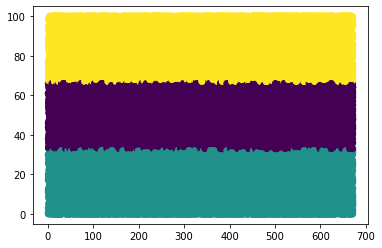

In [21]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
KMcluster = KMeans(n_clusters=3)
KMcluster.fit(y)
label = KMcluster.predict(y)
plt.scatter(X,y,c=label)

In [22]:
clicks = jj[jj['Clicks']>70]
clicks

,userId,jobID,Clicks,job_category
1,7,31,71,Finance
5,39,31,73,Finance
8,96,31,95,Finance
10,111,31,90,Finance
14,186,31,77,Finance
...,...,...,...,...
99987,656,1692,84,IT
99991,659,563,100,HR
99994,663,134528,91,Marketing
99995,663,134783,85,Marketing
